target: 'Best Performance'  
split 70-30, random state: 2020

1. Bersihkan data  
2. Buat analisa singkat hubungan antara fitur dan target 
3. Buat skema preprosessing   
4. Pilih fitur menggunakan  :
    * univariate statistics
    * iterative feature selection  

Gunakan model:  
* Decision Tree Classifier
* Logistic Regression

Bandingkan performa model dan fitur yang terpilih.

In [434]:
import pandas as pd
import numpy as np

# Dataset

In [435]:
df = pd.read_csv('BRI.csv')
df.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),...,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,8.00,PG06,8.00,0.50,RM_type_A,Permanent,Female,1964,Y,...,0,8,0,0,68.85,72.53,0.0,achiev_50%-100%,achiev_< 50%,reached
1,JG04,5.17,PG04,2.00,1.25,RM_type_A,Permanent,Male,1979,Y,...,9,3,0,0,94.81,101.13,3.0,achiev_50%-100%,achiev_50%-100%,reached
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1980,Y,...,0,6,0,0,72.82,71.30,0.0,achiev_100%-150%,achiev_< 50%,not_reached
3,JG04,7.92,PG04,4.00,0.17,RM_type_A,Permanent,Male,1984,Y,...,0,3,0,0,86.89,90.09,2.0,achiev_50%-100%,achiev_50%-100%,not_reached
4,JG04,1.83,PG03,1.83,2.08,RM_type_A,Permanent,Male,1984,Y,...,11,2,1,1,95.17,100.72,2.0,achiev_< 50%,achiev_> 1.5,not_reached


In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22005 entries, 0 to 22004
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              22005 non-null  object 
 1   job_duration_in_current_job_level      22005 non-null  float64
 2   person_level                           22005 non-null  object 
 3   job_duration_in_current_person_level   22005 non-null  float64
 4   job_duration_in_current_branch         22005 non-null  float64
 5   Employee_type                          21993 non-null  object 
 6   Employee_status                        22005 non-null  object 
 7   gender                                 22005 non-null  object 
 8   age                                    22005 non-null  int64  
 9   marital_status_maried(Y/N)             22005 non-null  object 
 10  number_of_dependences                  22005 non-null  int64  
 11  nu

# Data Cleaning

In [437]:
for i in df.columns[df.dtypes==object]:
    print(f"{i} : {df[i].unique()}")

job_level : ['JG05' 'JG04' 'JG03' 'JG06']
person_level : ['PG06' 'PG04' 'PG03' 'PG05' 'PG01' 'PG02' 'PG07' 'PG08']
Employee_type : ['RM_type_A' 'RM_type_C' 'RM_type_B' nan]
Employee_status : ['Permanent' 'Contract']
gender : ['Female' 'Male']
marital_status_maried(Y/N) : ['Y' 'N']
Education_level : ['level_4' 'level_5' 'level_3' nan 'level_1' 'level_2' 'level_0']
year_graduated : ['1987' '2001' '2007' '2006' nan '2008' '2011' '2010' '2013' '2014' '\\N'
 '1996' '2009' '2005' '2012' '1989' '1992' '0' '2000' '1994' '1997' '1993'
 '1995' '2004' '2015' '1986' '1999' '2003' '2016' '2044' '2018' '1991'
 '2002' '2017' '2201' '1998' '1990' '9999' '1984' '2020' '1988' '1983'
 '1985' '201' '2019' '2031' '____' '3016' '-' '2200' '102' '2999' '9464']
achievement_target_1 : ['achiev_50%-100%' 'achiev_100%-150%' 'achiev_< 50%' 'achiev_> 1.5' nan
 'Tidak diberikan target' 'Pencapaian 50%-100%' 'Pencapaian 100%-150%'
 'Pencapaian < 50%' 'Pencapaian > 1.5']
achievement_target_2 : ['achiev_< 50%' 'achiev

In [438]:
import re

In [439]:
# year_graduated : replace data yang tidak memiliki format tahun menjadi nan

df['year_graduated'] = df['year_graduated'].apply(lambda year: int(year) if year is not np.nan and re.search(r'^\d{4}$', year) else np.nan )
df['year_graduated'].unique()

array([1987., 2001., 2007., 2006.,   nan, 2008., 2011., 2010., 2013.,
       2014., 1996., 2009., 2005., 2012., 1989., 1992., 2000., 1994.,
       1997., 1993., 1995., 2004., 2015., 1986., 1999., 2003., 2016.,
       2044., 2018., 1991., 2002., 2017., 2201., 1998., 1990., 9999.,
       1984., 2020., 1988., 1983., 1985., 2019., 2031., 3016., 2200.,
       2999., 9464.])

In [440]:
# achievement_target_1 : replace 'Tidak diberikan target' menjadi nan & 'Pencapaian ' menjadi 'achiev_'

def replaceAchievementName(x):
    if x is np.nan:
        return np.nan
    name = x.replace("Pencapaian ", "achiev_")
    return name

df['achievement_target_1'] = df['achievement_target_1'].apply(replaceAchievementName)
df['achievement_target_1'].unique()

array(['achiev_50%-100%', 'achiev_100%-150%', 'achiev_< 50%',
       'achiev_> 1.5', nan, 'Tidak diberikan target'], dtype=object)

In [441]:
# achievement_target_2 : replace 'Tidak diberikan target' menjadi nan & 'Pencapaian ' menjadi 'achiev_'
df['achievement_target_2'] = df['achievement_target_2'].apply(replaceAchievementName)
df['achievement_target_2'].unique()

array(['achiev_< 50%', 'achiev_50%-100%', 'achiev_> 1.5',
       'achiev_100%-150%', nan, 'Tidak diberikan target'], dtype=object)

In [442]:
# achievement_target_3 : replace 'not_reached' menjadi not reached
df['achievement_target_3'] = np.where(df['achievement_target_3'] == 'not_reached', 'not reached', df['achievement_target_3'])
df['achievement_target_3'].unique()

array(['reached', 'not reached', nan], dtype=object)

# Analysis Data

In [443]:
# Missing Value
df.isna().sum()/df.shape[0]*100

job_level                                 0.000000
job_duration_in_current_job_level         0.000000
person_level                              0.000000
job_duration_in_current_person_level      0.000000
job_duration_in_current_branch            0.000000
Employee_type                             0.054533
Employee_status                           0.000000
gender                                    0.000000
age                                       0.000000
marital_status_maried(Y/N)                0.000000
number_of_dependences                     0.000000
number_of_dependences (male)              0.000000
number_of_dependences (female)            0.000000
Education_level                          16.396274
GPA                                      15.919109
year_graduated                           18.354919
job_duration_as_permanent_worker          9.338787
job_duration_from_training                0.000000
branch_rotation                           0.000000
job_rotation                   

In [444]:
import seaborn as sns
import matplotlib.pyplot as plt

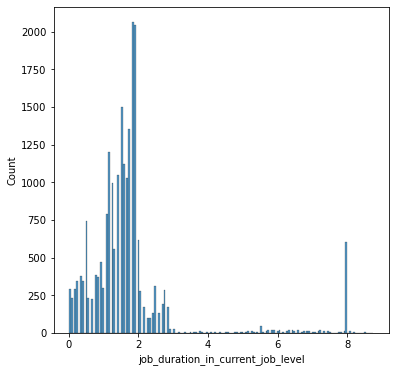

In [445]:
plt.figure(figsize=(6,6))
sns.histplot(df['job_duration_in_current_job_level'])
plt.show()

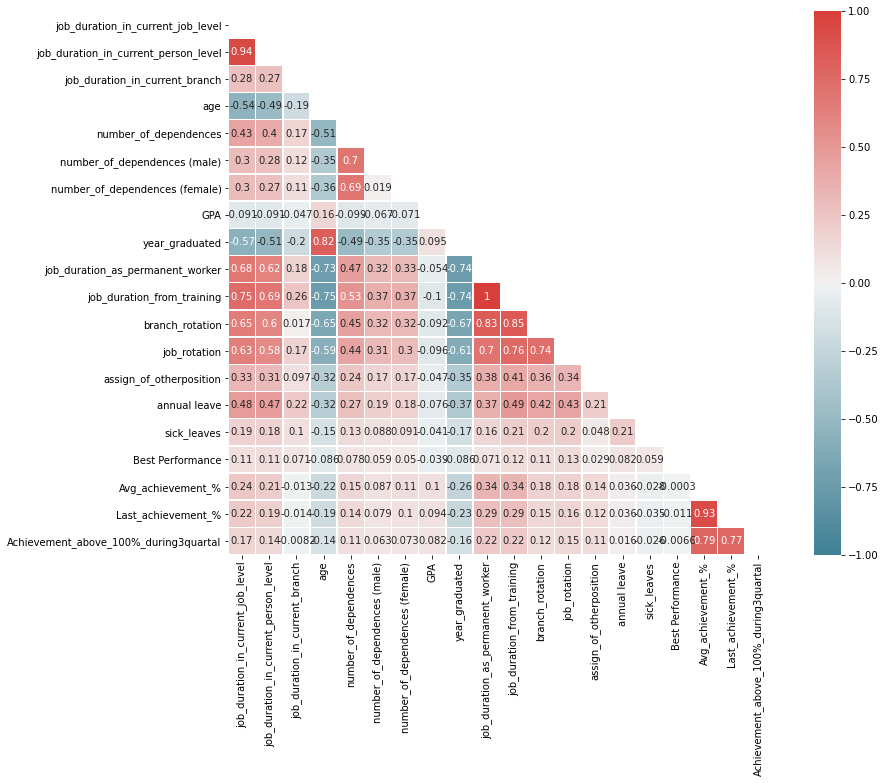

In [446]:
# correlation between numeric data
korelasi = df.corr(method='spearman')
plt.figure(figsize=(15,10))
sns.heatmap(korelasi, # dataset
            mask=np.triu(np.ones_like(korelasi, dtype=bool)), # If passed, data will not be shown in cells where mask is True. 
                        # Cells with missing values are automatically masked.
            cmap=sns.diverging_palette(220, 13, as_cmap=True), # The mapping from data values to color space.
            center=0, # The value at which to center the colormap when plotting divergant data
            square=True, # true = create square shaped
            vmin=-1,
            vmax=1,
            annot=True,
            linewidths=.5, # Width of the lines that will divide each cell
) 
plt.show()

In [447]:
from scipy.stats import chi2_contingency

In [448]:
# correlation between categorical data
for i in df.columns[df.dtypes==object]:
    df_count = pd.crosstab(df[i], df['Best Performance'])
    stats, pval, dof, expected = chi2_contingency(df_count)
    if pval <= 0.05:
        print(f'Ada keterkaitan antara {i} dan Best Performance')
    else:
        print(f'Tidak Ada keterkaitan antara {i} dan Best Performance')

Ada keterkaitan antara job_level dan Best Performance
Ada keterkaitan antara person_level dan Best Performance
Ada keterkaitan antara Employee_type dan Best Performance
Ada keterkaitan antara Employee_status dan Best Performance
Tidak Ada keterkaitan antara gender dan Best Performance
Ada keterkaitan antara marital_status_maried(Y/N) dan Best Performance
Tidak Ada keterkaitan antara Education_level dan Best Performance
Tidak Ada keterkaitan antara achievement_target_1 dan Best Performance
Tidak Ada keterkaitan antara achievement_target_2 dan Best Performance
Ada keterkaitan antara achievement_target_3 dan Best Performance


# Preprocessing

In [449]:
# outlier
for i in df.columns[df.dtypes!=object]:
    q1 = df[i].quantile(.25)
    q3 = df[i].quantile(.75)
    iqr = q3 - q1
    b_bawah = (q1-1.5*iqr).sum()
    b_atas = (q3+1.5*iqr).sum()
    
    outlier = (b_bawah + b_atas)/df[i].count()*100
    print(f'{i} : {outlier}%')

job_duration_in_current_job_level : 0.014042263122017722%
job_duration_in_current_person_level : 0.013224267211997274%
job_duration_in_current_branch : 0.009088843444671665%
age : 18.06862076800727%
number_of_dependences : 0.0045444217223358325%
number_of_dependences (male) : 0.0045444217223358325%
number_of_dependences (female) : 0.0045444217223358325%
GPA : 0.03302345692357583%
year_graduated : 22.386730490927306%
job_duration_as_permanent_worker : 0.045112781954887216%
job_duration_from_training : 0.03181095205635083%
branch_rotation : 0.022722108611679163%
job_rotation : 0.022722108611679163%
assign_of_otherposition : 0.0%
annual leave : 0.022722108611679163%
sick_leaves : 0.0045444217223358325%
Best Performance : 0.0%
Avg_achievement_% : 0.8501261983541191%
Last_achievement_% : 0.918837164872954%
Achievement_above_100%_during3quartal : 0.006368209896198179%


In [450]:
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,IterativeImputer,KNNImputer
from sklearn.preprocessing import RobustScaler,OneHotEncoder
import category_encoders as ce
from sklearn.compose import ColumnTransformer

In [451]:
# simple imputer modus & one hot encoder : Employee_type,Employee_status,gender,marital_status_maried(Y/N)
onehot_pipeline = Pipeline([
    ('imputer modus', SimpleImputer(strategy='most_frequent')),
    ('one hot', OneHotEncoder(drop='first'))
])

In [452]:
# simple imputer constant + binary : achievement_target_1,achievement_target_2,achievement_target_3   
constant_binary_pipeline = Pipeline([
    ('imputer binary', SimpleImputer(strategy='constant', fill_value='N')),
    ('binary constant', ce.BinaryEncoder())
])

In [453]:
#ordinal encoding : Education_level, job_level, person_level
ordinal_mapping = [
    {
        'col': 'Education_level',
        'mapping': {None:0, 'level_0':1, 'level_1': 2, 'level_2':3, 'level_3':4, 'level_4':5, 'level_5': 6}
    },
    {
        'col': 'job_level',
        'mapping': {None:0, 'JG03':1, 'JG04': 2, 'JG05':3, 'JG06':4}
    },
    {
        'col': 'person_level',
        'mapping': {None:0, 'PG01':1, 'PG02': 2, 'PG03':3, 'PG04':4, 'PG05':5, 'PG06': 6, 'PG07':7, 'PG08':8}
    }
    
]

In [454]:
# iterative imputer & robust scaler: age, year_graduated
robust_pipeline = Pipeline([
    ('iterative', IterativeImputer(max_iter=500, random_state=0)),
    ('robust', RobustScaler())
])

In [455]:
robust_features = ['age', 'year_graduated']
iterative_features = ['GPA','job_duration_as_permanent_worker','Avg_achievement_%','Last_achievement_%','Achievement_above_100%_during3quartal']


In [459]:
transformer = ColumnTransformer([
    ('onehot_pipeline', onehot_pipeline, ['Employee_type','Employee_status','gender','marital_status_maried(Y/N)']),
    ('constant_binary_pipeline', constant_binary_pipeline, ['achievement_target_1','achievement_target_2','achievement_target_3']),
    ('ordinal_pipeline', ce.OrdinalEncoder(mapping=ordinal_mapping), ['Education_level', 'job_level', 'person_level']),
    ('robust_pipeline', robust_pipeline, robust_features),
    ('iterative_imputer', IterativeImputer(max_iter=500, random_state=0), iterative_features)
], remainder='passthrough')

# Data Splitting

In [460]:
from sklearn.model_selection import train_test_split

In [461]:
x = df.drop(columns=['Best Performance'])
y = df['Best Performance']

In [462]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    stratify=y,
    test_size=0.3, # nilai default : 0.3
    random_state=2020
)

# Data Transformation

In [463]:
x_train_preprocessed = pd.DataFrame(transformer.fit_transform(x_train))
x_test_preprocessed = pd.DataFrame(transformer.transform(x_test))

/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [464]:
onehot_pipeline_features = list(transformer.transformers_[0][1][1].get_feature_names())
onehot_pipeline_features

['x0_RM_type_B', 'x0_RM_type_C', 'x1_Permanent', 'x2_Male', 'x3_Y']

In [465]:
constant_binary_pipeline_features = transformer.transformers_[1][1][1].get_feature_names()
constant_binary_pipeline_features

['0_0', '0_1', '0_2', '0_3', '1_0', '1_1', '1_2', '1_3', '2_0', '2_1', '2_2']

In [466]:
ordinal_pipeline_features = transformer.transformers_[2][1].get_feature_names()
ordinal_pipeline_features

['Education_level', 'job_level', 'person_level']

In [467]:
numericfeatures = list(df.drop(columns='Best Performance').select_dtypes([np.number]).columns)
otherfeatures = [i for i in numericfeatures if i not in robust_features and i not in iterative_features]

In [468]:
features = onehot_pipeline_features \
    + constant_binary_pipeline_features \
    + ordinal_pipeline_features \
    + robust_features \
    + iterative_features \
    + otherfeatures

In [469]:
x_train_preprocessed.columns = features
x_test_preprocessed.columns = features

# Feature Selection

In [470]:
from sklearn.feature_selection import RFE, chi2
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [471]:
model = DecisionTreeClassifier(max_depth = 10, criterion='entropy')

In [472]:
rfe = RFE(model)

In [473]:
rfe.fit(x_train_preprocessed, y_train)

RFE(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=10))

In [474]:
feature_select = pd.DataFrame({'select': rfe.support_}, index=features)
feature_select[feature_select['select'] == True]

,select
x1_Permanent,True
Education_level,True
age,True
year_graduated,True
GPA,True
Avg_achievement_%,True
Last_achievement_%,True
Achievement_above_100%_during3quartal,True
job_duration_in_current_job_level,True
job_duration_in_current_person_level,True


In [475]:
x_train_select = pd.DataFrame(rfe.transform(x_train_preprocessed), columns=feature_select[feature_select['select'] == True])
x_test_select = pd.DataFrame(rfe.transform(x_test_preprocessed), columns=feature_select[feature_select['select'] == True])

In [477]:
model.fit(x_train_select, y_train)
y_pred = model.predict(x_test_select)
print('score: ', accuracy_score(y_test, y_pred))

score:  0.8748863980611936
